# objectives: 
*1.*

## Introduction

This notebook is divided into five major parts:
<ol>
    <li>Introduction</li>
    <li>Data Description</li>
    <li>Exploratory Data Analyis or EDA (in short)</li>
    <li>Data Pre-Processing</li>
    <li>Modeling</li>
</ol>



## Data Description

The files given are:

1. train.csv: This is the dataset that we are gonna use to train our model to give predictions. SalePrice is theproperty's sale price in dollars. This is the target variable that we are trying to predict.
2. test.csv:The test set will be used to see how well our model performs on unseen data. For the test set, we do not provide the Target variable i.e, SalePrice. It is our job to predict these outcomes. For each passenger in the house, we use the model that we trained to predict the price of the house.
3. data_description.txt - This gives us the full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here.
4. sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms. This serves as an example of how our submission should look like.

You can find all the files at kaggle competition "House Prices - Advanced Regression Techniques": https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

<h2>Importing the Libraries</h2>

We start off by importing all the libraries that we will need later on. We will be using NumPy and Pandas for data analysis and matplotlib (Matlab for python), seaborn for data visualisation. Below I have given the steps to load the data onto varibles.

In [2]:
import numpy as np                 # linear algebra
import pandas as pd                # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats            # for some statistics
from scipy.stats import norm, skew # for some statistics
import seaborn as sns              # plot
import matplotlib.pyplot as plt    # plot 
%matplotlib inline

" %matplotlib inline " makes life easy by returning output plots without needing to write plt.show() code everytime after each plot!

### load train set and test set 

This is how we assign the datasets to variables in python using pandas.

In [3]:
# load train data 
df_train = pd.read_csv("train.csv")
# display data 
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
# Load Test data
df_test = pd.read_csv("test.csv")
# display test data 
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### 1. Understand the data using the pandas library

***1. Print the first five rows of the dataset***

In [5]:
# We will use the .head() function to display the first five columns of the dataset to get a feel of the dataset.
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***2. Print last 5 rows of the dataset***

In [6]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


***3. Find out the total number of rows and columns of the data set***

In [7]:
df_train.shape

(1460, 81)

***4. Find out the columns, data types, and presence of null values or missing values in the data set***

In [8]:
#info gives us information about index and column data types.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

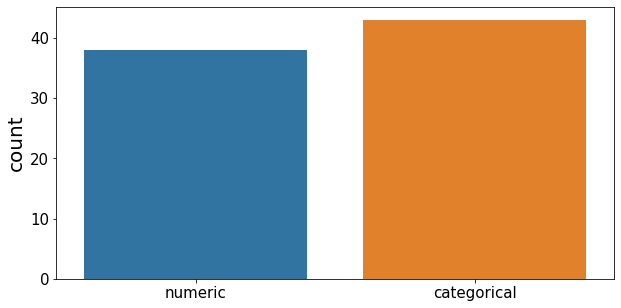

In [9]:
# Checking how many column have a categorical and numerical data type
column_data_type = []
for col in df_train.columns:
    data_type = df_train[col].dtype
    if df_train[col].dtype in ['int64','float64']:
        column_data_type.append('numeric')
    else:
        column_data_type.append('categorical')
plt.figure(figsize=(10,5))
size=20
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
sns.countplot(x=column_data_type)
plt.show()

In [10]:
print("{} numbers of columns have a numerical data type" .format(column_data_type.count('numeric')))
print("{} numbers of columns have a categorical data type" .format(column_data_type.count('categorical')))

38 numbers of columns have a numerical data type
43 numbers of columns have a categorical data type


# 2. Univariate Analysis

***1. Find out missing values graphically***

<AxesSubplot:>

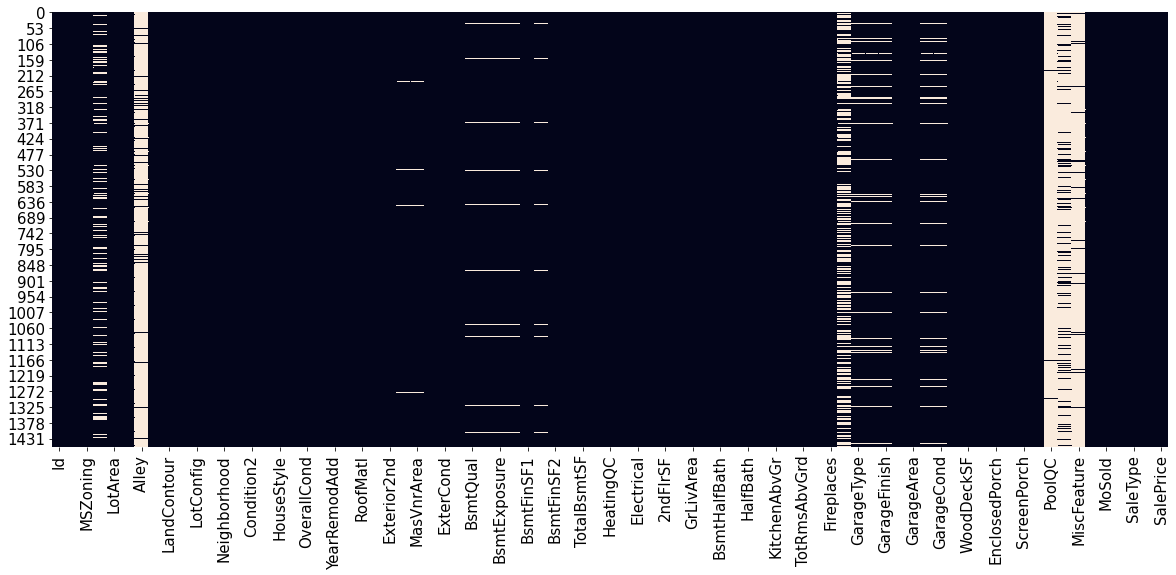

In [11]:
# checking missing values

sns.heatmap(df_train.isnull(),cbar=False)

In [12]:
# # Confirmation for the Graph
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Let us look at the percentage of the missing values of the dataset.

In [13]:
# Checking how many column have missing values
missing_values = df_train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
missing_values
NAN_col = list(missing_values.to_dict().keys())
missing_values_data = pd.DataFrame(missing_values)
missing_values_data.reset_index(level=0, inplace=True)
missing_values_data.columns = ['Feature','Number of Missing Values']
missing_values_data['Percentage of Missing Values'] = (100.0*missing_values_data['Number of Missing Values'])/len(df_train)
missing_values_data

,Feature,Number of Missing Values,Percentage of Missing Values
0,PoolQC,1453,99.520548
1,MiscFeature,1406,96.301370
2,Alley,1369,93.767123
3,Fence,1179,80.753425
4,FireplaceQu,690,47.260274
5,LotFrontage,259,17.739726
6,GarageType,81,5.547945
7,GarageYrBlt,81,5.547945
8,GarageFinish,81,5.547945
9,GarageQual,81,5.547945


## impute the missing values onto the features 

***1. We will impute the Nan or null values of 'PoolQC' with None because there are about 99.5% null values, which means that most houses don't have a Pool.***



In [14]:
df_train["PoolQC"] = df_train["PoolQC"].fillna("None")

***2 We will impute the Nan or null values of 'MiscFeature' with None because there are about 96.3% null values, which means that most houses don't contain miscellaneous Features.***

In [15]:
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")

***3.We will impute the Nan or null values of 'Alley' which refers to type of Alley access with None as null values signify that the house does not contain any Alley access.***

In [16]:
df_train["Alley"] = df_train["Alley"].fillna("None")

***4.We will impute the Nan or null values of 'Fence' with None as null values signify that the house does not contain any Fences.***

In [17]:
df_train["Fence"] = df_train["Fence"].fillna("None")

***5.We will impute the Nan or null values of 'FireplaceQu' with None as null values signify that the house does not contain any fireplace.***

In [18]:
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

***6.We will impute the Nan or null values of 'LotFrontage' with median values taking into consideration that the area of each street connected to the house property is most likely similar to other houses of the Neighborhood.***

In [19]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

***7.We replace the 'GarageType', 'GarageFinish', 'GarageQual' and 'GarageCond' missing values into None signifying that those homes most likely don't have any garage for vehicles.***

In [20]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

***8.We replace the null values of 'GarageYrBlt', 'GarageArea', 'GarageCars' as no garage equals no cars.***

In [21]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)

***9. The missing values of 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath' are filled with zero because the null values most likely signifies no basement.***

In [22]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)

***10.The missing values'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2 are filled with Nonne as NaN values signifies no basement.***

In [23]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')

***11.The NA values of "MasVnrType" and "MasVnrArea" refer to no masonry veneer for these houses. Therefore the Area can be imputed with zero and the type can be imputed with None.***

In [24]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

***12. The 'MSZoning' refers to the general zoning classification. We fill the NaN values with 'RL' which is the most occurring value.***

In [25]:
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

***13.Most of the values of this feature are "AllPub" except for one "NoSeWa" and 2 NA. Since the house with "NoSewa' is present in the training set, this feature is not helpful in predictive modeling so we drop it.***

In [26]:
df_train = df_train.drop(['Utilities'], axis=1)

***14.The NA values means typical which is mentioned in the data description.***

In [27]:
df_train["Functional"] = df_train["Functional"].fillna("Typ")

***15.There is only one NA value present here in "Electrical" so we impute it 'SBrkr' since it is the most occurring value.***

In [28]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

***16.There is only one NA value present here in "KitchenQual" so we impute it 'TA' since it is the most occurring value.***

In [29]:
df_train['KitchenQual'] = df_train['KitchenQual'].fillna(df_train['KitchenQual'].mode()[0])

***17.There is only one NA value present in both Exterior1st and Exterior2nd so we fill it with the most frequent string.***

In [30]:
df_train['Exterior1st'] = df_train['Exterior1st'].fillna(df_train['Exterior1st'].mode()[0])
df_train['Exterior2nd'] = df_train['Exterior2nd'].fillna(df_train['Exterior2nd'].mode()[0])

***18.Fill it again with the most frequent which is "WD" in this case.***

In [31]:
df_train['SaleType'] = df_train['SaleType'].fillna(df_train['SaleType'].mode()[0])

***19.The NA values here refers to No Building class so we fill it with None.***

In [32]:
df_train['MSSubClass'] = df_train['MSSubClass'].fillna("None")

In [33]:
# Checking the maximum of null variable it have 
df_train.isnull().sum().max()

0

The result 0 above shows we no longer have any missing values.

<h3>Generating new features</h3>

We can generate some new features from existing ones. 

***1. the total square feet of the house can be computed as: Total_Square_Feet = BsmtFinSF1 + BsmtFinSF2 + 1stFlrSF + 2ndFlrSF + TotalBsmtSF***

In [34]:
df_train['Total_Square_Feet'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] + df_train['1stFlrSF'] + 
                                                                 df_train['2ndFlrSF'] + df_train['TotalBsmtSF'])

***2.Total number of Baths in the house can be computed as: Total_Bath = FullBath + 0.5 * HalfBath + BsmtFullBath + 0.5*BsmtHalfBath***

In [35]:
df_train['Total_Bath'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) + df_train['BsmtFullBath'] + 
                                                                  (0.5 * df_train['BsmtHalfBath']))

***3.Total_Porch_Area can be computed as: Total_Porch_Area = OpenPorchSF + 3SsnPorch + EnclosedPorch + ScreenPorch + WoodDeckSF***

In [36]:
df_train['Total_Porch_Area'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] + 
                                df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF'])

***4.the size of per room in the house can be computed as: SqFtPerRoom =  GrLivArea/(TotRmsAbvGrd + FullBath + HalfBath + KitchenAbvGr***

In [37]:
df_train['SqFtPerRoom'] = df_train['GrLivArea'] / (df_train['TotRmsAbvGrd'] + df_train['FullBath'] +
                                                       df_train['HalfBath'] + df_train['KitchenAbvGr'])

<h3>Transforming Categorical Variables</h3>

We now transform a few numerical variables that are categorical then we perform label encoding onto them.

In [ ]:
#MSSubClass=The building class
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
df_train['OverallCond'] = df_train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[c].values)) 
    df_train[c] = lbl.transform(list(df_train[c].values))

# shape        
print('Shape all_data: {}'.format(df_train.shape))

In [ ]:
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

We find the skewed features and then perform Box Cox Transformation of highly skewed features.

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_train[feat] = boxcox1p(df_train[feat], lam)


In [ ]:
#Getting dummy categorical features.
df_train = pd.get_dummies(df_train)
print(df_train.shape)

In [ ]:
df_train.head()

In [ ]:
# Checking the corelation beetween the predicted and training column
top_features = df_train.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [ ]:
# Making Function for plotting and checking the relation between two
def plot_data(col, discrete=False):
    if discrete:
        fig, ax = plt.subplots(1,2,figsize=(14,6))
        sns.stripplot(x=col, y='SalePrice', data=df_train, ax=ax[0])
        sns.countplot(df_train[col], ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')
    else:
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        sns.scatterplot(x=col, y='SalePrice', data=df_train, ax=ax[0])
        sns.distplot(df_train[col], kde=False, ax=ax[1])
        fig.suptitle(str(col) + ' Analysis')

In [ ]:
plot_data('OverallQual',True)

In [ ]:
df_train = df_train.drop(df_train[(df_train['OverallQual'] == 10) & (df_train['SalePrice'] < 200000)].index)

In [ ]:
plot_data('GrLivArea')

In [ ]:
plot_data('Total_Bath')

In [ ]:
# Dropping the outliers in the data

df_train = df_train.drop(df_train[(df_train['Total_Bath'] > 4) & (df_train['SalePrice'] < 200000)].index)

In [ ]:
plot_data('TotalBsmtSF')

In [ ]:
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF'] > 3000) & (df_train['SalePrice'] < 400000)].index)

In [ ]:
df_train.reset_index()

### Deal with outliers

In [ ]:
from sklearn.ensemble import IsolationForest #isolation forest for the remove outliers

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(df_train)
y_noano = clf.predict(df_train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

df_train = df_train.iloc[y_noano[y_noano['Top'] == 1].index.values]
df_train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", df_train.shape[0])

In [ ]:
X = df_train.copy()
X.drop(['SalePrice'],axis=1,inplace=True)
y = df_train['SalePrice'].values
X.shape,y.shape

In [ ]:
# Standardising the data
from sklearn.preprocessing import StandardScaler#Standardising the data
scale = StandardScaler()
X = scale.fit_transform(X)